Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

We have to predict the rings of each abalone which will lead us to the age of that abalone. 







In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#As described in the dataset documentation, the age of an Abalone is given as Rings + 1.5 (and that’s the label we want
#to estimate). Therefore, let’s add an Age label to our dataset:


df['Age'] = df['Rings'] + 1.5

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [4]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In the column Sex, M, F, and I represent male, female, and infant, respectively. 
Nevertheless, we will ignore this feature based on its correlation value with the label, and only consider physical (measurable) features in order to infer ages in our further steps..
Since age is a derivate from rings, they represent same data , and are highly colinear. So we drop'rings' feature and keep 'age' for our label.


In [5]:

df=df.drop(columns=['Rings'] , axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [6]:

df.shape

(4177, 9)

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

Seems there are no nulls in all columns.Good to proceed.

# EDA

# Data Visualization:

Lets see how data is distributed for every column in our dataset:
Before that lets split our dataset into Nominal , Ordinal & Continuous data, before we plot the graphs.
For the given dataset, we only have continuous and nominal data.

# Making a DataFrame of Continuous data

In [10]:
df_visualization_continuous = df[['Length','Diameter','Height','Whole weight','Shucked weight',
                               'Viscera weight','Shell weight','Age']].copy()
df_visualization_continuous.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [11]:
df_visualization_continuous.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

# Checking the distribution of the continuous values of the float type 

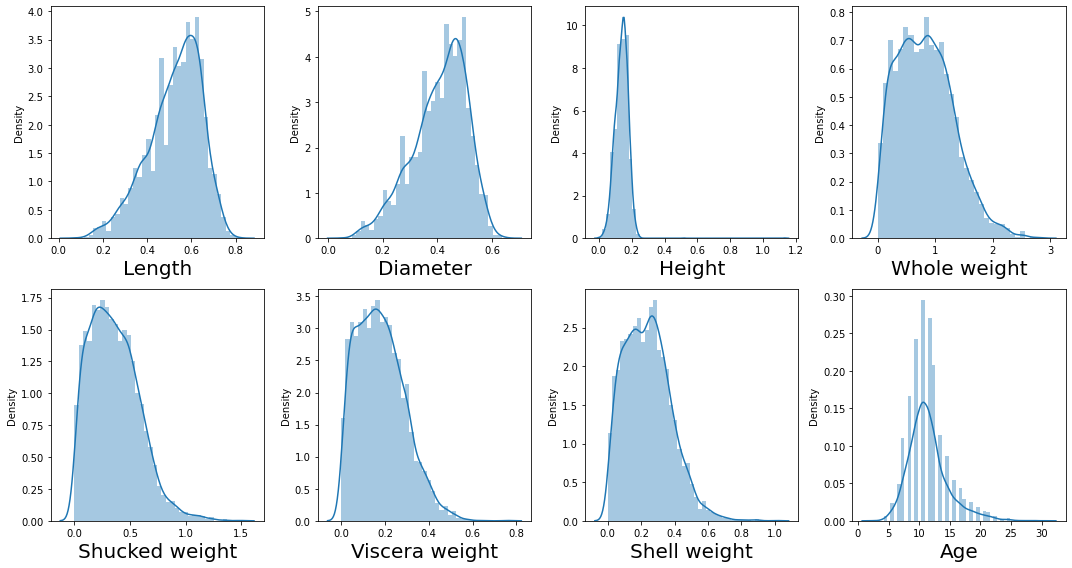

In [12]:
#Data distribution:
#Dist Plot:

plt.figure(figsize = (15,8), facecolor = 'white')
plotnumber = 1   #initializing 1 to a name

for column in df_visualization_continuous:
    if plotnumber <= 9:
        ax = plt.subplot(2,4,plotnumber) #In 2 rows I want 4 columns to be plotted 
        sns.distplot(df_visualization_continuous[column], kde=True)
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
        plt.tight_layout()
        

Observation: Almost all the features are skewed.

# Making DataFrame of the Nominal data:

In [13]:
df_visualization_nominal= df[['Sex']].copy()
df_visualization_nominal.columns

Index(['Sex'], dtype='object')

In [14]:
df_visualization_nominal.dtypes

Sex    object
dtype: object

# Visualization of nominal data

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


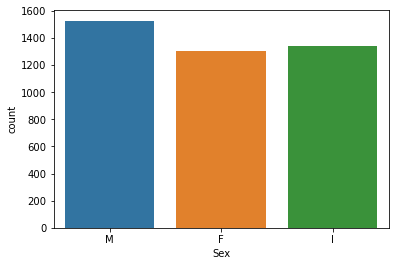

In [15]:
import seaborn as sns
ax= sns.countplot(x="Sex", data = df_visualization_nominal)
print(df_visualization_nominal['Sex'].value_counts())

Observation: The total number of male is:1528 , female is: 1307, infant:1342.

# Encoding 'Sex' in the DataFrame:

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [17]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Statistical Summary

In [19]:
#Describe the dataset
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Count is same in all the columns: 4177 , means no NaN's. 
 if S.D is close to mean , it implies the data is not clean, and there is variance the data.

<AxesSubplot:>

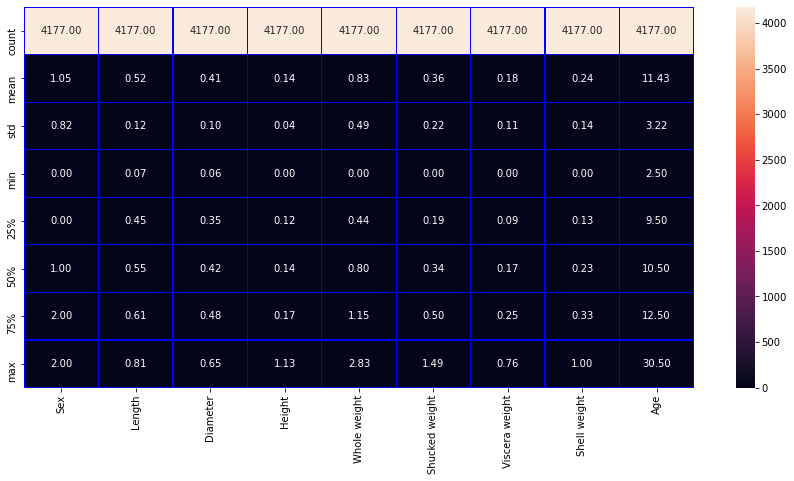

In [20]:
#Heatmap using df.describe

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1, linecolor='blue',fmt=".2f")

<AxesSubplot:>

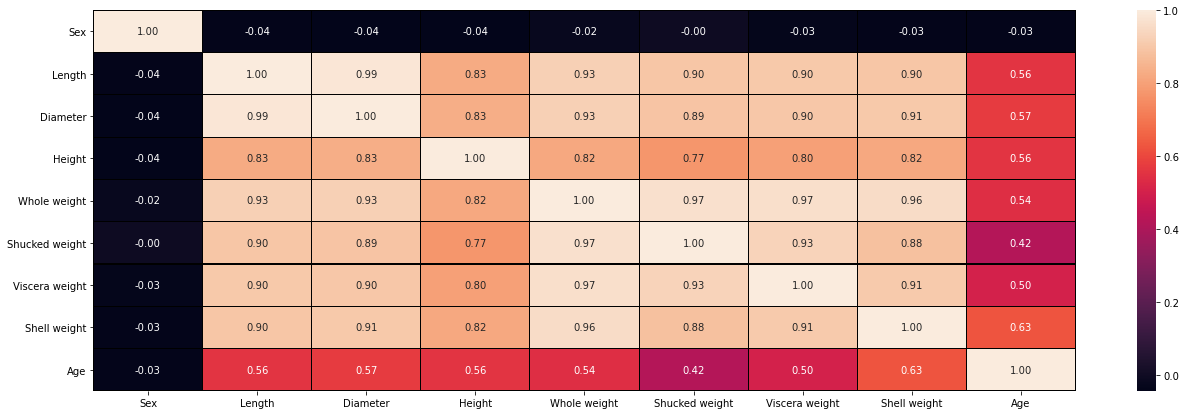

In [21]:
#Heatmap using df.corr

plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

In [22]:
#Dividing columns into target and features
x = df.iloc[:, :-1]
y = df.iloc[:,-1:]

corr = []
for i in x:
    c = df[i].corr(df['Age'], method='spearman')
    corr.append(c)
    
corr    

[-0.02034856851711219,
 0.6043853354046326,
 0.6228950050921535,
 0.6577163709860909,
 0.6308319554663986,
 0.5394199820834579,
 0.6143438123140512,
 0.6924745607793563]

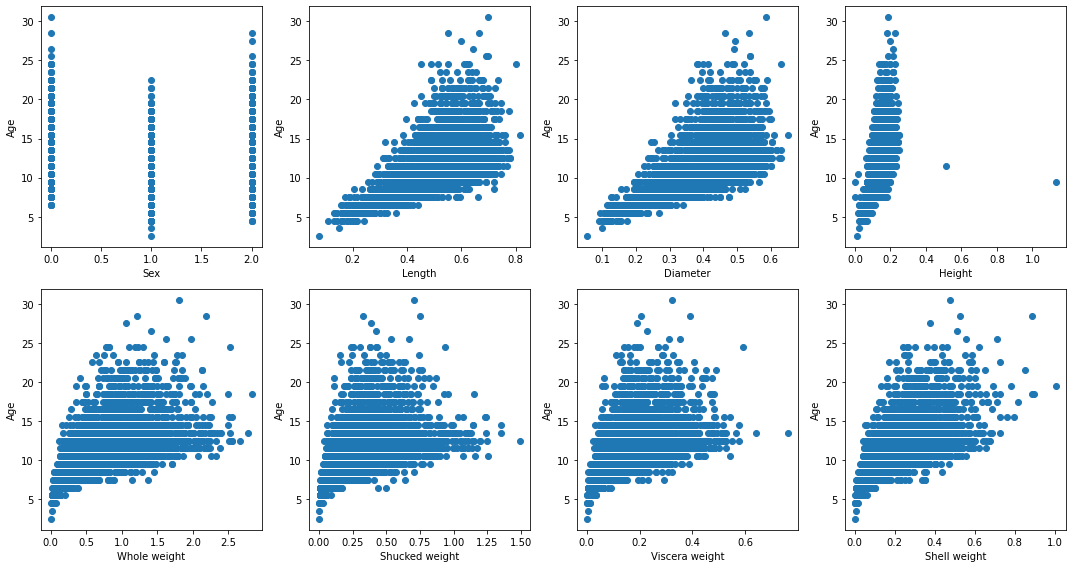

In [23]:
#Scatter plot finds relationship between x and y.

plt.figure(figsize = (15,8), facecolor= 'white')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('Age', fontsize = 10)
        plotnumber += 1
        plt.tight_layout()

<AxesSubplot:>

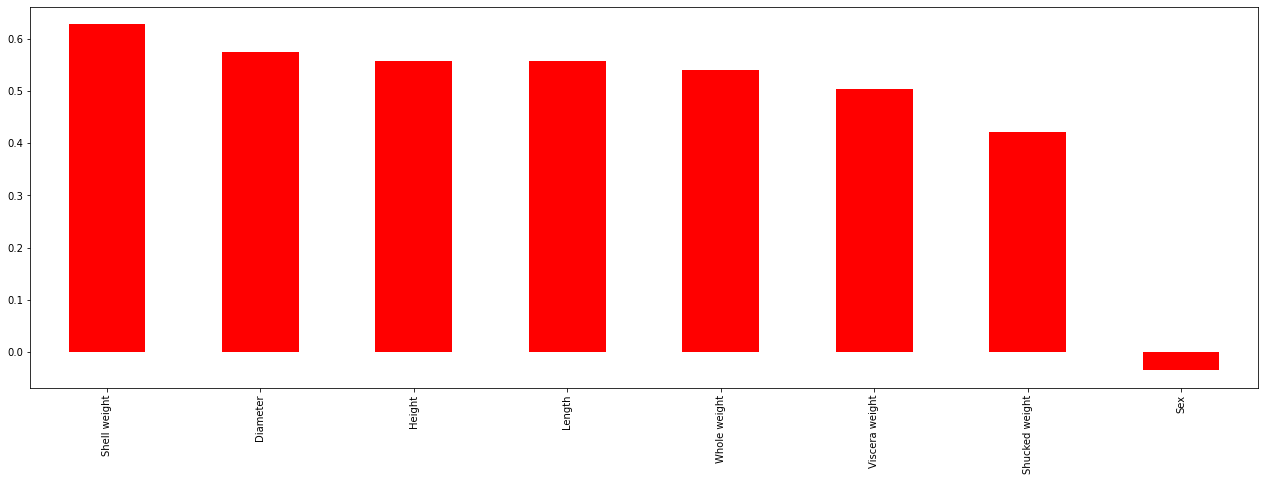

In [24]:
plt.figure(figsize=(22,7))
df.corr()['Age'].sort_values(ascending=False).drop(['Age']).plot(kind='bar',color='r')

## Outcome of correlation: with Age


#### All the features are positively correlated with our label 'Age'

#### Length               60.4%  -> Strong bond ;
#### Diameter             62%  -> Strong bond ;
#### Height               65.7%  -> Strong bond ;
#### Whole weight         63%  -> Strong bond ;
#### Shucked weight       53.9%   -> Strong bond ;
#### Viscera weight       61.4%  -> Strong bond ;
#### Shell weight         69%  -> Strong bond 

#### Max Correlation: Shell Weight 
#### Min Correlation: Sex    

# Skewness:

In [25]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

Skewness threshold is taken as: =/-0.50
All the features are skewed excluding 'Sex'. We will treat the skewness in the further steps.

# Checking for the Outliers:

In [26]:
df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

Since Sex is nominal data we are not going to consider skewness and outliers for 'Sex'.

# Outliers

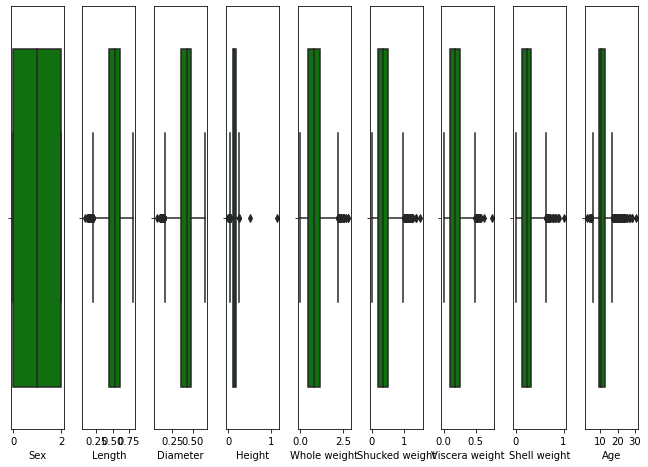

In [27]:
#BoxPlot:

collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]], color='green', orient='v')
    plt.tight_layout()

All the features have significant number of outliers.

# Divide data into features and label before checking correlation and multicollinearity:

In [28]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1:]

x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [29]:
y.head()

,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


# Multicollinearity

In [30]:
#If any 2 features tell same story, we will eliminate one feature which has got less importance.
#Before checking for the multicollinearity (feature vs feature), we should scale our data.
 
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled.shape

(4177, 8)

In [31]:
x_scaled.shape[1]

8

In [32]:
x_scaled

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

It is always desirable to have VIF value as small as possible, but it can lead to many significant independent variables
to be removed from the dataset. Therefore a VIF = 5 is often taken as a threshold. Which means that any independent variable greater than 5 will have to be removed considering some factors. Although the ideal threshold value depends upon the problem at hand.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.010580,Sex
1,40.771963,Length
2,41.858341,Diameter
3,3.560886,Height
4,109.593589,Whole weight
5,28.434776,Shucked weight
6,17.367103,Viscera weight
7,21.258423,Shell weight


We can that all features have multicollinearity problems, except for gender and height.  Whole weight has the highest Vif value because it is a linear function of other remaining body weights.

Now lets look into features which are interrelated using a scatter matrix, so that if we see some kind of a pattern
or a relation, then we eliminate the feature which is less important, and will keep  which have greater correlation with the label.

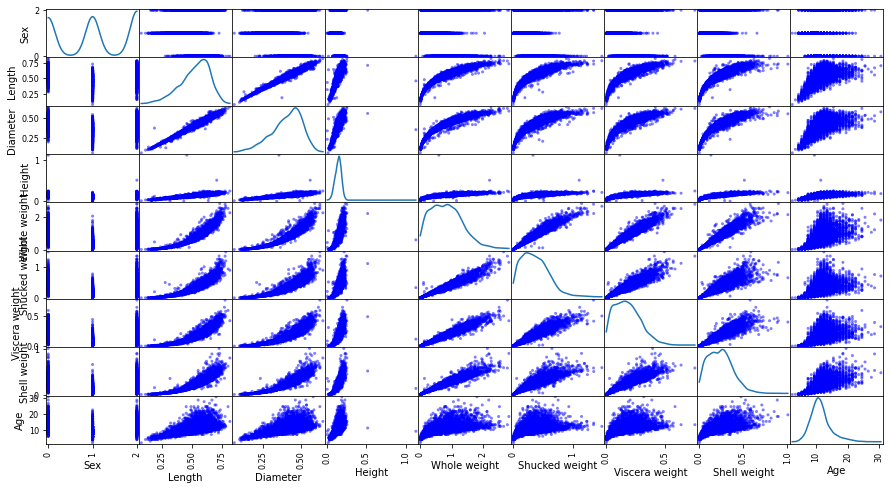

In [34]:

import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,8), diagonal='kde',color='blue')
plt.show()

Observation:

According to this problem, from the above graph, we eliminate Whole weight which is of the highest vif value, and Length , Diameter.

# Data Cleaning

In [35]:
#Since the 'Sex' has low correlation of 3%, we will also drop 'Sex' along with higher vif values features

df=df.drop(columns=['Sex','Diameter','Length','Whole weight'])
df

,Height,Shucked weight,Viscera weight,Shell weight,Age
0,0.095,0.2245,0.1010,0.1500,16.5
1,0.090,0.0995,0.0485,0.0700,8.5
2,0.135,0.2565,0.1415,0.2100,10.5
3,0.125,0.2155,0.1140,0.1550,11.5
4,0.080,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...
4172,0.165,0.3700,0.2390,0.2490,12.5
4173,0.135,0.4390,0.2145,0.2605,11.5
4174,0.205,0.5255,0.2875,0.3080,10.5
4175,0.150,0.5310,0.2610,0.2960,11.5


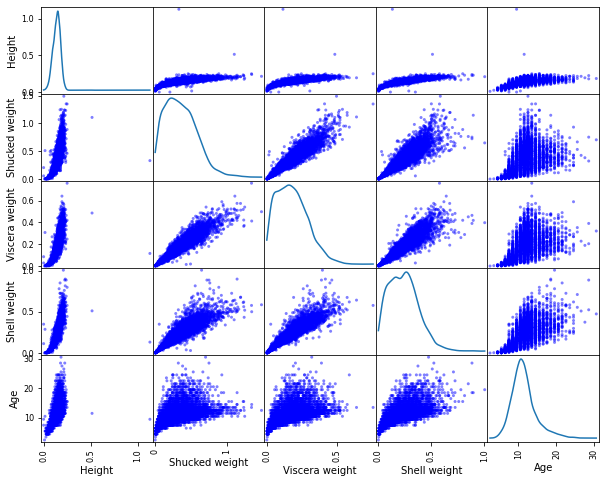

In [36]:
#Lets check again if there is any more linear relation between the features.
scatter_matrix(df, figsize=(10,8), diagonal='kde',color='blue')
plt.show()

Above matrix shows the multicollineality looks a lot better, it is treated. Good to proceed.

# Outlier Removal

# Z Score Technique

In [37]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(4177, 5)

In [38]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  270,  275,  277,  278,  294,
        310,  313,  314,  334,  351,  355,  358,  362,  375,  416,  417,
        428,  431,  433,  469,  478,  480,  501,  530,  572,  628,  673,
        674,  675,  678,  744,  754,  756,  811,  891,  891, 1048, 1051,
       1193, 1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1209,
       1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1428, 1528, 1754,
       1756, 1757, 1759, 1761, 1762, 1762, 1763, 1763, 1821, 1982, 2051,
       2090, 2108, 2108, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2544, 2624, 2624, 2625, 2709, 2710, 2710, 2810, 2810, 2811,
       2811, 2862, 2863, 2863, 3007, 3008, 3140, 3148, 3149, 3149, 3151,
       3151, 3188, 3193, 3280, 3359, 3427, 3427, 3599, 3628, 3713, 3715,
       3715, 3715, 3924, 3930, 3944, 3961, 3962, 3

In [39]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 5)
(4046, 5)


In [40]:
#Percentage dataloss:
loss_percent = (4177-4046)/4177*100
loss_percent

3.136222169020828

Since the data loss is in the acceptable range , we will go ahead with the outlier removed dataset.

# Checking for skewness after removal of Outliers

In [41]:
df_new.skew()

Height           -0.289605
Shucked weight    0.461336
Viscera weight    0.442913
Shell weight      0.350448
Age               0.693264
dtype: float64

Looks like the skewness is handled. So we dont need to treat the skewness.

# Seperating the columns into features and target

In [42]:
x = df_new.drop("Age",axis = 1)
y = df_new["Age"]

# Scaling the data with MinMaxScaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x = mms.fit_transform(x)

x

array([[0.34042553, 0.21882701, 0.19764012, 0.22546012],
       [0.31914894, 0.0956136 , 0.09439528, 0.10276074],
       [0.5106383 , 0.25036964, 0.27728614, 0.31748466],
       ...,
       [0.80851064, 0.51552489, 0.56440511, 0.46779141],
       [0.57446809, 0.52094628, 0.51229105, 0.4493865 ],
       [0.76595745, 0.92952193, 0.7394297 , 0.75460123]])

# Train_Test_Split & finding the best random state:

In [44]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
for i in range (0,1000):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    if round(r2_score(target_train,pred_train)*100,1)==round(r2_score(target_test,pred_test)*100,1):
        print(f"At random state {i}, The model performs very well")
        
        print(f"At random state {i}, the training accuracy is:- {r2_score(target_train,pred_train)*100}")
        print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)*100}")
        print("\n")


At random state 123, The model performs very well
At random state 123, the training accuracy is:- 49.5652303458086
At random state 123, the testing accuracy is:- 49.64290550961358


At random state 177, The model performs very well
At random state 177, the training accuracy is:- 49.57908056064008
At random state 177, the testing accuracy is:- 49.61650364066116


At random state 563, The model performs very well
At random state 563, the training accuracy is:- 49.57829258069355
At random state 563, the testing accuracy is:- 49.5514752107911


At random state 810, The model performs very well
At random state 810, the training accuracy is:- 49.51915756682784
At random state 810, the testing accuracy is:- 49.54679830255522


At random state 867, The model performs very well
At random state 867, the training accuracy is:- 49.580391838911595
At random state 867, the testing accuracy is:- 49.598781490004114


At random state 946, The model performs very well
At random state 946, the training a

In [47]:
features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=0.2,random_state=987)

In [48]:
lr.fit(features_train,target_train)

LinearRegression()

In [49]:
pred_test = lr.predict(features_test)

In [50]:
print(r2_score(target_test,pred_test))

0.495548839592296


# Cross Validation of the model

In [51]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean= cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.4937768939917284 and accuracy score for training is -0.49583891311910966 and accuracy score for testing is 0.495548839592296


At cross fold 3 the cv score is 0.47835841730588297 and accuracy score for training is -0.49583891311910966 and accuracy score for testing is 0.495548839592296


At cross fold 4 the cv score is 0.4076717173107455 and accuracy score for training is -0.49583891311910966 and accuracy score for testing is 0.495548839592296


At cross fold 5 the cv score is 0.4052343778112477 and accuracy score for training is -0.49583891311910966 and accuracy score for testing is 0.495548839592296


At cross fold 6 the cv score is 0.41314975956195127 and accuracy score for training is -0.49583891311910966 and accuracy score for testing is 0.495548839592296


At cross fold 7 the cv score is 0.41947703552271276 and accuracy score for training is -0.49583891311910966 and accuracy score for testing is 0.495548839592296


At cross fold 8 the cv score is

Since the number of CV folds does not have much impact on the accuracy and cv_score, we take CV=2.

In [52]:
features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=0.2,random_state=987)

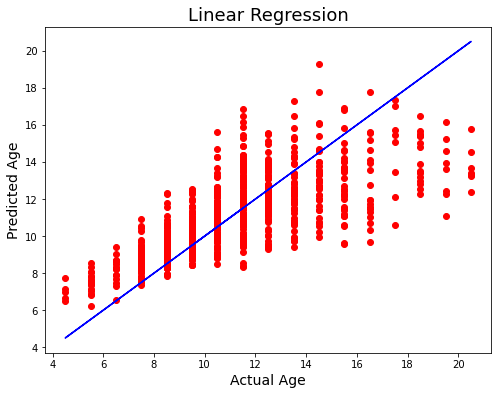

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Age', fontsize=14)
plt.ylabel('Predicted Age', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

The Best fit line covers less prediction data points, lets see if we can improve the score a little bit more.

# Regularization

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [56]:
ls = Lasso(alpha = 0.0001,random_state = 0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.4955453124415512

In [57]:
cv_score = cross_val_score(ls,x,y,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.4937762223816432

We are getting model accuracy and cross validation both as 49%, which shows our model is not overfitting,
and performing good.

# Ensemble Technique

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [59]:
rf = RandomForestRegressor(criterion="mae", max_features="log2")
rf.fit(features_train,target_train)

rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2_score:', rfs*100)
rfscore = cross_val_score(rf,x,y,cv=2)
rfc = rfscore.mean()
print('Cross Val Score:', rfc*100)

R2_score: 50.70335827182032
Cross Val Score: 50.48382615399386


# Saving the model

In [63]:
import pickle
filename = 'Abalone_project.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [64]:
loaded_model = pickle.load(open('Abalone_project.pkl','rb'))
result = loaded_model.score(features_test,target_test)
print(result)

0.5070335827182032


In [65]:
conclusion = pd.DataFrame([loaded_model.predict(features_test)[:], pred_decision[:]], index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,800,801,802,803,804,805,806,807,808,809
Predicted,9.56,13.905,12.79,8.08,9.46,9.97,8.75,11.72,7.4,6.55,...,10.82,10.22,8.79,14.88,12.33,5.82,15.7,8.01,10.59,13.14
Original,9.56,13.905,12.79,8.08,9.46,9.97,8.75,11.72,7.4,6.55,...,10.82,10.22,8.79,14.88,12.33,5.82,15.7,8.01,10.59,13.14


We can visualize there is no error in prediction of 'Age' using the above model.